In [1]:
import os
for dirname, _, filenames in os.walk(r'C:\Users\Dinesh\Documents\Lung cancer'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Dinesh\Documents\Lung cancer\Benign cases\Bengin case (1).jpg
C:\Users\Dinesh\Documents\Lung cancer\Benign cases\Bengin case (10).jpg
C:\Users\Dinesh\Documents\Lung cancer\Benign cases\Bengin case (100).jpg
C:\Users\Dinesh\Documents\Lung cancer\Benign cases\Bengin case (101).jpg
C:\Users\Dinesh\Documents\Lung cancer\Benign cases\Bengin case (102).jpg
C:\Users\Dinesh\Documents\Lung cancer\Benign cases\Bengin case (103).jpg
C:\Users\Dinesh\Documents\Lung cancer\Benign cases\Bengin case (104).jpg
C:\Users\Dinesh\Documents\Lung cancer\Benign cases\Bengin case (105).jpg
C:\Users\Dinesh\Documents\Lung cancer\Benign cases\Bengin case (106).jpg
C:\Users\Dinesh\Documents\Lung cancer\Benign cases\Bengin case (107).jpg
C:\Users\Dinesh\Documents\Lung cancer\Benign cases\Bengin case (108).jpg
C:\Users\Dinesh\Documents\Lung cancer\Benign cases\Bengin case (109).jpg
C:\Users\Dinesh\Documents\Lung cancer\Benign cases\Bengin case (11).jpg
C:\Users\Dinesh\Documents\Lung cancer\Benign cases\Beng

In [2]:
#Importing the required Libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
from tensorflow.keras import models, layers
from tensorflow.keras.layers.experimental import preprocessing

In [6]:
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image

In [7]:
import PIL
import pathlib
import matplotlib.image as mpimg

In [8]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [9]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [10]:
# Setting parameters

In [11]:
BATCH_SIZE = 62
IMAGE_SIZE = 256
CHANNELS=3

In [12]:
# Loading the dataset

In [13]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\Dinesh\Documents\Lung cancer",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1938 files belonging to 4 classes.


In [14]:
# Exploring the dataset

In [15]:
class_names = dataset.class_names
class_names

['Benign cases', 'Invalid', 'Malignant cases', 'Normal cases']

In [16]:
len(dataset)

32

In [17]:
# Visualizing the dataset

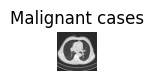

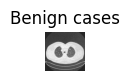

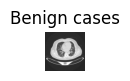

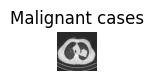

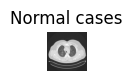

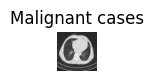

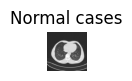

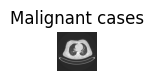

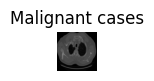

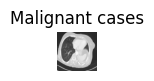

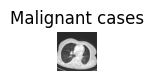

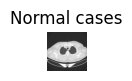

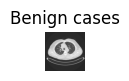

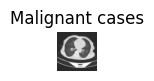

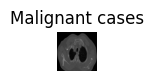

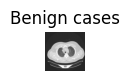

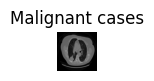

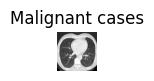

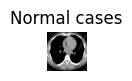

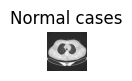

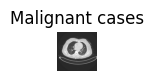

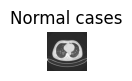

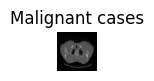

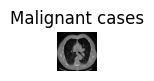

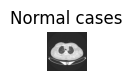

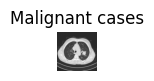

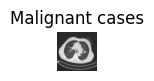

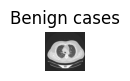

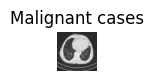

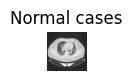

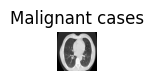

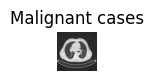

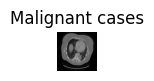

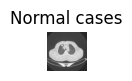

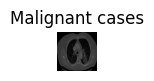

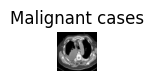

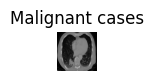

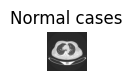

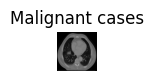

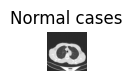

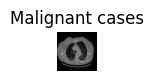

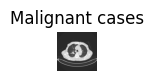

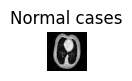

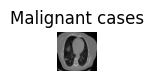

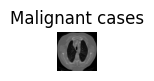

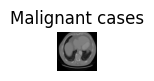

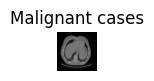

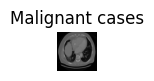

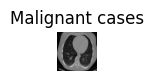

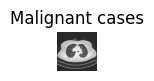

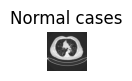

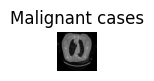

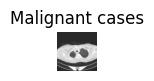

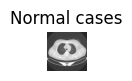

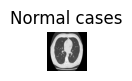

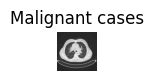

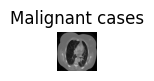

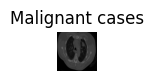

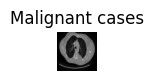

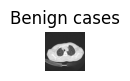

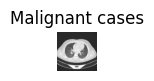

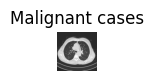

In [18]:
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")
        plt.show()

In [19]:
# Partitioning the dataset

In [20]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + val_split + test_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [21]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [22]:
# Preprocessing layers

In [23]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255),
])

In [24]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [25]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

In [26]:
# Building a CNN Model

In [27]:
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

In [28]:
# Compiling the model

In [29]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)       

In [31]:
# Training the model

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with the EarlyStopping callback
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=500,  # Set this to a high number; training will stop early if needed
    callbacks=[early_stopping]
)


Epoch 1/500


25/25 [==============================] - 63s 2s/step - loss: 1.0349 - accuracy: 0.6004 - val_loss: 0.9535 - val_accuracy: 0.6398
Epoch 2/500
25/25 [==============================] - 58s 2s/step - loss: 0.9417 - accuracy: 0.6203 - val_loss: 0.8422 - val_accuracy: 0.6571
Epoch 3/500
25/25 [==============================] - 74s 3s/step - loss: 0.7805 - accuracy: 0.6523 - val_loss: 0.6844 - val_accuracy: 0.6774
Epoch 4/500
25/25 [==============================] - 71s 3s/step - loss: 0.6903 - accuracy: 0.6794 - val_loss: 0.6454 - val_accuracy: 0.7366
Epoch 5/500
25/25 [==============================] - 64s 2s/step - loss: 0.6249 - accuracy: 0.7480 - val_loss: 0.5737 - val_accuracy: 0.7688
Epoch 6/500
25/25 [==============================] - 65s 3s/step - loss: 0.4876 - accuracy: 0.7972 - val_loss: 0.5825 - val_accuracy: 0.7634
Epoch 7/500
25/25 [==============================] - 62s 2s/step - loss: 0.3924 - accuracy: 0.8452 - val_loss: 0.3821 - val_accuracy: 0.8280
Epoch 8/500

In [34]:
#  Evaluating the Model

In [35]:
model.evaluate(test_ds)

4/4 [==============================] - 5s 517ms/step - loss: 0.0106 - accuracy: 1.0000


[0.010570158250629902, 1.0]

In [36]:
acc = history.history['accuracy']

In [37]:
acc

[0.6003989577293396,
 0.6203457713127136,
 0.652258038520813,
 0.6793548464775085,
 0.7480053305625916,
 0.7972074747085571,
 0.8451613187789917,
 0.886303186416626,
 0.8819354772567749,
 0.9432258009910583,
 0.9335106611251831,
 0.970079779624939,
 0.9658064246177673,
 0.9873670339584351,
 0.9880319237709045,
 0.9966755509376526,
 0.9734042286872864,
 0.9906914830207825,
 0.991356372833252]

In [38]:
loss = history.history['loss']

In [39]:
loss

[1.0349416732788086,
 0.9416970014572144,
 0.7804551124572754,
 0.6903242468833923,
 0.624876856803894,
 0.4875710606575012,
 0.39238470792770386,
 0.3106389045715332,
 0.29758110642433167,
 0.1719396412372589,
 0.18235273659229279,
 0.08706800639629364,
 0.07786332815885544,
 0.03965312987565994,
 0.03785949945449829,
 0.018325965851545334,
 0.07264214009046555,
 0.02475295402109623,
 0.030040374025702477]

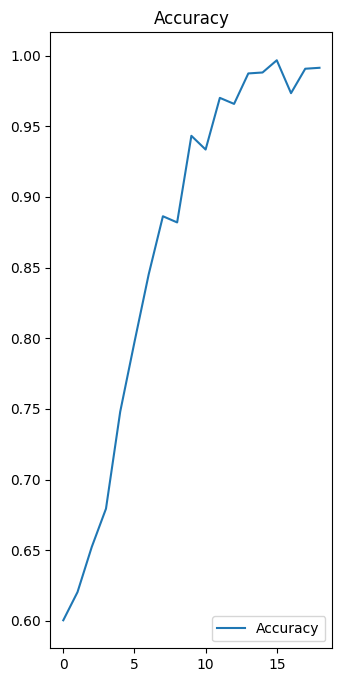

In [42]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(19), acc, label='Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.show()

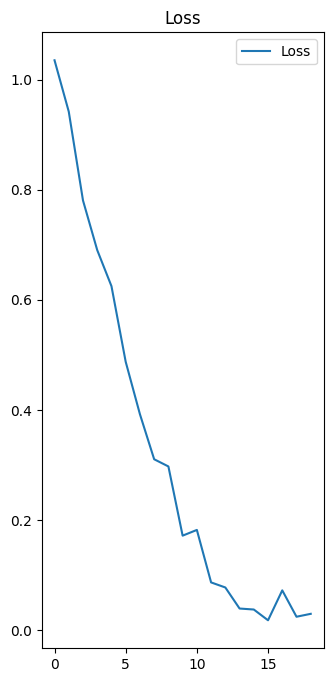

In [43]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 2)
plt.plot(range(19), loss, label='Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

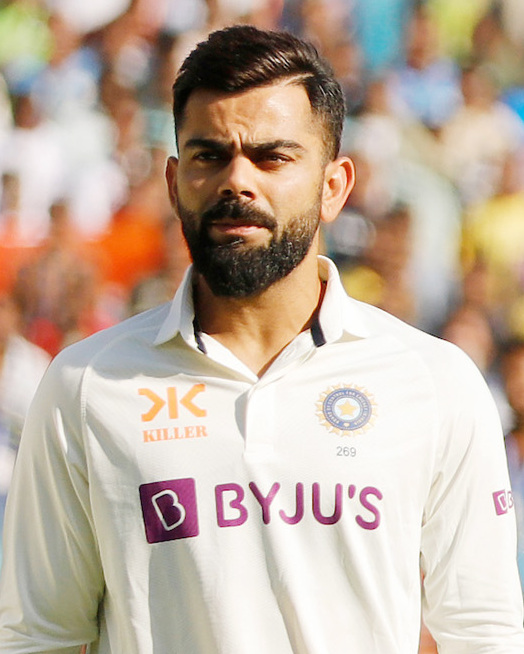

In [44]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
image_path = r"C:\Users\Dinesh\Downloads\lung testing2.jpg"
image = load_img(image_path)
image_array =img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [48]:
pred = model.predict(scaled_img)

1/1 [==============================] - 0s 120ms/step


In [49]:
output=model.predict(scaled_img)
output = class_names[np.argmax(pred)]
output

1/1 [==============================] - 0s 72ms/step


'Invalid'

In [50]:
import pickle
tensorflow_model=open('Lung_cancer_prediction1.pkl','wb')
pickle.dump(model,tensorflow_model)
tensorflow_model.close()